# Titanic Capstone Project #
## Nora Cook ##
**Please use this template and fill in your code and comments (* as frequent as applicable *) ** 

You may add more cells but *do not change the order or delete template cells*

All questions are answered before any code, but concluding remarks are listed after any coding in the plotting section.


## Step 1: Reading the data

In [1227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
titanic = pd.read_csv("train.csv") 
test = pd.read_csv('test.csv')

titanic.head(2)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

## Step 2: Cleaning the data

**1** . Create a bar chart showing how many missing values are in each column

In [1228]:
performance=titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1229]:
performance=titanic.isnull().sum()
list(performance)

[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]

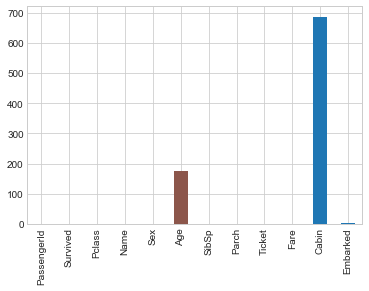

In [1230]:
performance.plot(kind='bar')
plt.savefig('Null Values.jpg')

**2** . Which column has the most `NaN` values?

The Cabin column has the most null values.

How many cells in that column are empty?

There are 687 empty cells in the Cabin column.

**3**. Delete all rows where `Embarked` is empty

In [1231]:
titanic = titanic.dropna(axis=0, subset=['Embarked'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


**4**. Fill all empty cabins with **¯\\_(ツ)_/¯**
 
 Note: `NaN`, empty, and missing are synonymous.

In [1232]:
titanic['Cabin'].fillna(value='**Â¯\\_(ãƒ„)_/Â¯**', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S


## Step 3: Feature extraction

**1**. There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [1233]:
titanic['FamilyCount']=(titanic['Parch'])+(titanic['SibSp'])
titanic['FamilyCount'].head(10)
#test['FamilyCount'] = (test['Parch'])+(test['Sibsp'])

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: FamilyCount, dtype: int64

In [1234]:
test['FamilyCount'] = (test['Parch'])+(test['SibSp'])

In [1235]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0


**2**. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [1236]:
titanic['IsReverend'] = titanic['Name'].apply\
    (lambda name: 1 if 'rev.' in name.lower() else 0).astype('int') 

In [1237]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0


**3**. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`

Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

In [1238]:
titanicE = pd.get_dummies(titanic, columns=["Embarked"])
titanicE.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,0,0,0,0,1


Do the same thing for `Sex`

In [1239]:
titanic3 = pd.get_dummies(titanic, columns=['Sex'])
titanic3.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0,0,1


BONUS: Extract the title from everyone's name and create dummy columns

## Step 4: Exploratory analysis

**1**. What was the survival rate overall?

In [1240]:
titanic['Survived'].mean()

0.38245219347581555

The overall survival rate for the titanic was 38.25%. In the following exploratory analysis and graphs we will see that some factors like sex, class, age, and where one embarked played a key role in ones survival from the devasting Titanic disaster.

**2**. Which gender fared the worst? 

The male gender fared worse than the females.

What was their survival rate?

If you were a female there was an almost 75% chance of surviving at 74.04%. If you were male your liklihood of survival was 18.89%. I guess the men were very chivalrous at the time the Titanic sank.

In [1241]:
print(titanic.groupby('Sex').Survived.mean())

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


If you were a female there was an almost 75% chance of surviving at 74.04%. If you were male your liklihood of survival was 18.89%. I guess the men were very chivalrous at the time the Titanic sank.

**3**. What was the survival rate for each `Pclass`?

The survival rate for each class was 62.61% first class, 46.28% second class, and 24.23% for the third class

In [1242]:
FM_survival_rate = titanic.pivot_table\
    (index='Pclass', values='Survived', aggfunc=np.mean
    )
FM_survival_rate

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


**4**. Did any reverends survive? How many?

There were six reverends and they all died. 

In [1243]:
def bool_into_int(x):
    if x == True:
        return 1
    else:
        return 0

In [1244]:
bool_into_int(True)

1

In [1245]:
int_tit=titanic['IsReverend'].map(bool_into_int)


In [1246]:
int_tit.sum()

6

In [1247]:
mask =(titanic['Survived'] == 1) & (titanic['IsReverend'] == 1)


In [1248]:
titanic[mask].count().iloc[0]

0

**5**. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

The survival rate for cabins marked '**Â¯\\_(ãƒ„)_/Â¯**' was 29.99%

In [1249]:
unknown_cabin_mask = (titanic['Cabin'] == '**Â¯\\_(ãƒ„)_/Â¯**')
titanic[unknown_cabin_mask]
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0


In [1250]:
survived_mask = (titanic['Survived'] == 1)
survived_unknowns = titanic[survived_mask]
survived_unknowns.shape

(340, 14)

In [1251]:
percent_of_unknown_cabin_survival = 206/687
percent_of_unknown_cabin_survival

0.29985443959243085

**6** . What is the survival rate for people whose `Age` is empty?

52 passengers with no age survived out of 177. That is a 29.38% survival rate.

In [1252]:
titanic.loc[(titanic["Survived"] == 1)\
    & (titanic["Age"].isnull())].count().iloc[0]

52

In [1253]:
52/177

0.2937853107344633

**7** .What is the survival rate for each port of embarkation?

93 passengers from port Cherbourg (Embarked_C), 30 from port Queensworth (Embarked_Q) passengers, and 217 from port Southhampton (Embarked_S) passengers survived. The Survival Rates 37.65% for port C, 38.96 from port Q and 33.67% from port S.

In [1254]:
Embarked_C_amt = titanicE.pivot_table\
(index='Embarked_C', values='Survived', aggfunc=np.sum)
Embarked_C_amt

,Survived
Embarked_C,
0,247
1,93


In [1255]:
Embarked_C_per = 93/(93+247)
Embarked_C_per

0.2735294117647059

In [1256]:
Embarked_Q_amt = titanicE.pivot_table\
(index='Embarked_Q', values='Survived', aggfunc=np.sum)
Embarked_Q_amt

,Survived
Embarked_Q,
0,310
1,30


In [1257]:
Embarked_Q_per = 30/(310+30)
Embarked_Q_per

0.08823529411764706

In [1258]:
Embarked_S_amt = titanicE.pivot_table\
(index='Embarked_S', values='Survived', aggfunc=np.sum)
Embarked_S_amt

,Survived
Embarked_S,
0,123
1,217


In [1259]:
Embarked_S_per = 217/(123+217)
Embarked_S_per

0.638235294117647

**8** .What is the survival rate for children (under 12) in each `Pclass`?

The survival rates for children under 12 and under per class is 
57.97%. Children in the second class had a 100% survival rate followed by the first class at 75% and sadly only 41.67% of the children in the third class lived

In [1260]:
titanic_filtered = titanic.loc[(titanic["Survived"] == 1)
& (titanic["Age"] <=12)]
titanic_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,2,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,**Â¯\_(ãƒ„)_/Â¯**,C,3,0
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,**Â¯\_(ãƒ„)_/Â¯**,S,3,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,**Â¯\_(ãƒ„)_/Â¯**,S,2,0
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,**Â¯\_(ãƒ„)_/Â¯**,C,1,0
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,**Â¯\_(ãƒ„)_/Â¯**,S,2,0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,**Â¯\_(ãƒ„)_/Â¯**,S,2,0
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,3,0
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,**Â¯\_(ãƒ„)_/Â¯**,S,2,0
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,2,0


In [1261]:
titanic_youth_survived = titanic_filtered['Pclass'].value_counts()
titanic_youth_survived

3    20
2    17
1     3
Name: Pclass, dtype: int64

In [1262]:
titanic_youth = titanic.loc[titanic["Age"] <= 12]
titanic_youth.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,**Â¯\_(ãƒ„)_/Â¯**,S,4,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,**Â¯\_(ãƒ„)_/Â¯**,Q,5,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,**Â¯\_(ãƒ„)_/Â¯**,S,4,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,**Â¯\_(ãƒ„)_/Â¯**,C,3,0


In [1263]:
total_youth_perclass = titanic_youth['Pclass'].value_counts()
total_youth_perclass

3    48
2    17
1     4
Name: Pclass, dtype: int64

In [1264]:
titanic_youth_survived/total_youth_perclass

3    0.416667
2    1.000000
1    0.750000
Name: Pclass, dtype: float64

In [1265]:
total_survived_youth = titanic_filtered['Pclass'].value_counts().sum()
total_survived_youth

40

In [1266]:
total_youth = titanic_youth['Pclass'].value_counts().sum()
total_youth

69

In [1267]:
total_survived_youth/total_youth

0.5797101449275363

**9** . Did the captain of the ship survive? Is he on the list?


One captain was in this dataset his name was Edward Gifford Crosby and he died. I looked it up on google. He was not the captain of the Titanic. The captain of the Titanic's name was Captain Edwar John Smith.

In [1268]:
mask = titanic['Name'].str.contains('Capt')

In [1269]:
titanic[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0


Links to Captain Info:
http://www.titanic-titanic.com/edward_gifford_crosby.shtml
https://www.google.com/search?q=captain+of+the+titanic&rlz=1C5CHFA_enUS776US776&oq=captain+of+the+titanic&aqs=chrome.0.0l6.3486j0j4&sourceid=chrome&ie=UTF-8

What are the titles of people on the ship?

**10** . Of all the people that died, who had the most expensive ticket? How much did it cost?

Miss. Anna Ward died and spent the most for her ticket at 512.33. (I am unsure of the denomination)

In [1270]:
mask = titanic['Survived'] == 0 

In [1271]:
died = titanic[mask]
died.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,**Â¯\_(ãƒ„)_/Â¯**,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,**Â¯\_(ãƒ„)_/Â¯**,S,4,0


In [1272]:
Fare = titanic['Fare']

In [1273]:
titanic['Fare'].max()

512.3292

In [1274]:
titanic['Fare'].argmax()

/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


258

In [1275]:
titanic.loc[titanic['Fare'] == 512.32920000000001]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,**Â¯\_(ãƒ„)_/Â¯**,C,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,0


**11**. Does having family on the boat help or hurt your chances of survival?

Having one to three family members helped ones survival rate were having three family members one had the maximum advantage. Having now family members or more then three family members was a disadvantage and one's survival rate is lowered significantly.

In [1276]:
FM_survival_rate = titanic.pivot_table\
(index='FamilyCount', values='Survived', aggfunc=np.mean)
FM_survival_rate

,Survived
FamilyCount,
0,0.300935
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


## Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [1277]:
import matplotlib.pyplot as plt
import seaborn as sns

A family of three had the best chance of survival. For instance a mother father pair with one child.

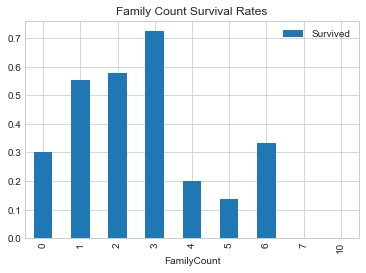

In [1278]:
FM_survival_rate.plot(kind='bar')
plt.title('Family Count Survival Rates')
plt.savefig('FMC.jpg')

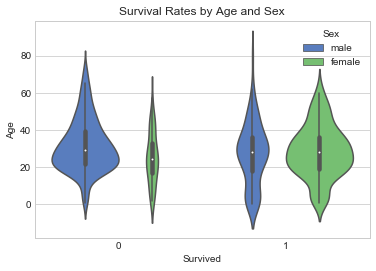

In [1279]:
sns.set_style("whitegrid")
sns.violinplot(x='Survived', y='Age', hue='Sex', data=titanic,\
    scale='count', palette='muted'
    )
plt.title('Survival Rates by Age and Sex')
plt.savefig('age and sex.jpg')

Here we see what ages and sexes survived and died. 0 stands for died and 1 stands for survived. What we notice is that very old men had a good chance of surviving and that there were more old men then older women, which is surprising because women supposedly live longer. 

In the following graph we can see that single females the most likely to survive.

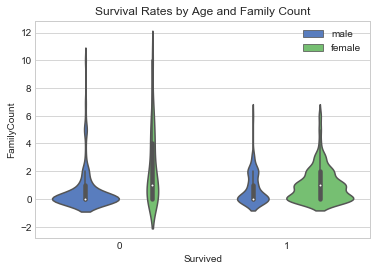

In [1280]:
sns.set_style("whitegrid")
sns.violinplot(x='Survived', y='FamilyCount', hue='Sex', data=titanic, scale='count', palette='muted')
plt.title('Survival Rates by Age and Family Count')
plt.legend(loc='upper right')
plt.savefig('rates_age_sex.jpg')

The fare for the ride has a right skew. The mode or the most purchased fare for a ticket was 43. (I am unsure of the denomination.) Most tickets were bought for under a hundred. There were a few outliers were people bought tickets for over 500. Some people got on the boat free of charge.

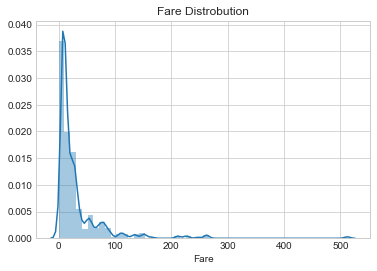

In [1281]:
sns.distplot(titanic['Fare'])
plt.title('Fare Distrobution')
plt.savefig('FareDist.jpg')

In [1282]:
titanic['Fare'].value_counts().max()

43

In [1283]:
titanic['Fare'].min()

0.0

In [1284]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0


Here we see what classes and what sexes survived. Females of the first class having the best chances.

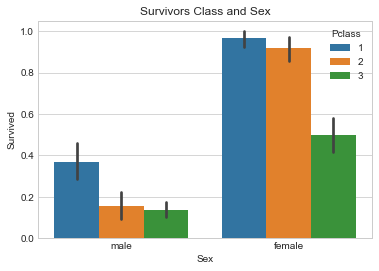

In [1285]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic);
plt.title('Survivors Class and Sex')
plt.savefig('SClassSex.jpg')

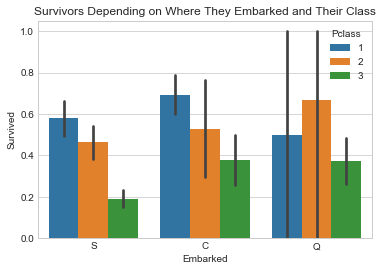

In [1286]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=titanic);
plt.title('Survivors Depending on Where They Embarked and Their Class')
plt.savefig('SEmbarkedCLass.jpg')

Here we see that the most first class tickets came from Cherbourg, which also had the highest survival rate

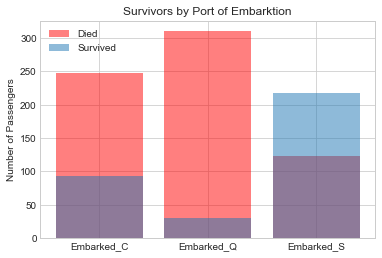

In [1287]:
y1 = [247,310,123]
y2 = [93,30,217]
x = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

plt.bar(x, y1, color='red', alpha=.5)
plt.bar(x, y2, alpha=.5)
plt.title('Survivors by Port of Embarktion')
plt.ylabel('Number of Passengers')
plt.legend(('Died', 'Survived'), loc=2)
plt.savefig('Port.jpg')

Passengers departing from the port of Southampton had the highest rate of survival.

# New work on the Titanic

## Setting up our columns for our models

In [1288]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0


In [1289]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
FamilyCount    889 non-null int64
IsReverend     889 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 144.2+ KB


In [1290]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilyCount    418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


We need to apply the same changes we made with train dataset to the test data set. So we change the null values for Cabins to **Â¯\_(ãƒ„)_/Â¯**, and we fill in the missing Fare price with mode price. We also forward fill in the missing values in the age column.

In [1291]:
#Here we fill in the null values for cabins in the test dataset with **Â¯\_(ãƒ„)_/Â¯**
test['Cabin'].fillna('**Â¯\_(ãƒ„)_/Â¯**', inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,**Â¯\_(ãƒ„)_/Â¯**,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,**Â¯\_(ãƒ„)_/Â¯**,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,**Â¯\_(ãƒ„)_/Â¯**,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,**Â¯\_(ãƒ„)_/Â¯**,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,**Â¯\_(ãƒ„)_/Â¯**,S,2


In [1292]:
#We fill in the missing Fare data in the test dataset with the mean
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [1293]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
FamilyCount     0
dtype: int64

In [1294]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
FamilyCount      0
IsReverend       0
dtype: int64

In [1295]:
#Now we fill in the null values in the age column with a forward fill. I am using forward
#fill because I want to have a variety of ages to fill in the null values. We do this for 
#titanic and test dataset
titanic['Age'].fillna(method='ffill', inplace=True)

In [1296]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
FamilyCount    889 non-null int64
IsReverend     889 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 144.2+ KB


In [1297]:
test['Age'].fillna(method='ffill', inplace=True)

In [1298]:
test.dropna(axis=0, how='all')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,**Â¯\_(ãƒ„)_/Â¯**,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,**Â¯\_(ãƒ„)_/Â¯**,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,**Â¯\_(ãƒ„)_/Â¯**,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,**Â¯\_(ãƒ„)_/Â¯**,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,**Â¯\_(ãƒ„)_/Â¯**,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,**Â¯\_(ãƒ„)_/Â¯**,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,**Â¯\_(ãƒ„)_/Â¯**,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,**Â¯\_(ãƒ„)_/Â¯**,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,**Â¯\_(ãƒ„)_/Â¯**,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,**Â¯\_(ãƒ„)_/Â¯**,S,2


In [1299]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
FamilyCount    418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [1300]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
FamilyCount    889 non-null int64
IsReverend     889 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 144.2+ KB


### Get Dummies

In [1301]:
titanic = pd.get_dummies(titanic, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])


In [1302]:
titanic = pd.get_dummies(titanic, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

Here we are going to get some basic stats

In [1303]:
#Describe numerical features
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.535624,0.524184,0.382452,32.096681,0.906637,0.006749,0.350956,0.649044,0.188976,0.086614,0.724409
std,256.998173,0.486260,0.834700,14.527483,1.103705,0.806761,49.697504,1.614703,0.081922,0.477538,0.477538,0.391710,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1304]:
#Describe objects
titanic.describe(include=['O'])

,Name,Ticket,Cabin
count,889,889,889
unique,889,680,147
top,"Wilhelms, Mr. Charles",1601,**Â¯\_(ãƒ„)_/Â¯**
freq,1,7,687


In [1305]:
#Check the correlation
titanic_corr = titanic.corr()
titanic_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,0.024020,-0.057686,-0.001657,0.012703,-0.040258,0.012730,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.069907,-0.034040,0.083151,0.255290,0.018277,-0.064871,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.287864,0.081656,0.016824,-0.548193,0.064221,-0.030788,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.024020,-0.069907,-0.287864,1.000000,-0.205270,-0.164226,0.080703,-0.222362,0.077389,-0.063014,0.063014,0.014780,0.019489,-0.025218
SibSp,-0.057686,-0.034040,0.081656,-0.205270,1.000000,0.414542,0.160887,0.890654,-0.026717,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.164226,0.414542,1.000000,0.217532,0.782988,-0.022061,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.080703,0.160887,0.217532,1.000000,0.218658,-0.022876,0.179958,-0.179958,0.270731,-0.116684,-0.163758
FamilyCount,-0.040258,0.018277,0.064221,-0.222362,0.890654,0.782988,0.218658,1.000000,-0.029284,0.203191,-0.203191,-0.046852,-0.059007,0.078197
IsReverend,0.012730,-0.064871,-0.030788,0.077389,-0.026717,-0.022061,-0.022876,-0.029284,1.000000,-0.060616,0.060616,-0.039791,0.023461,0.020095
Sex_female,-0.043136,0.541585,-0.127741,-0.063014,0.116348,0.247508,0.179958,0.203191,-0.060616,1.000000,-1.000000,0.084520,0.075217,-0.121405


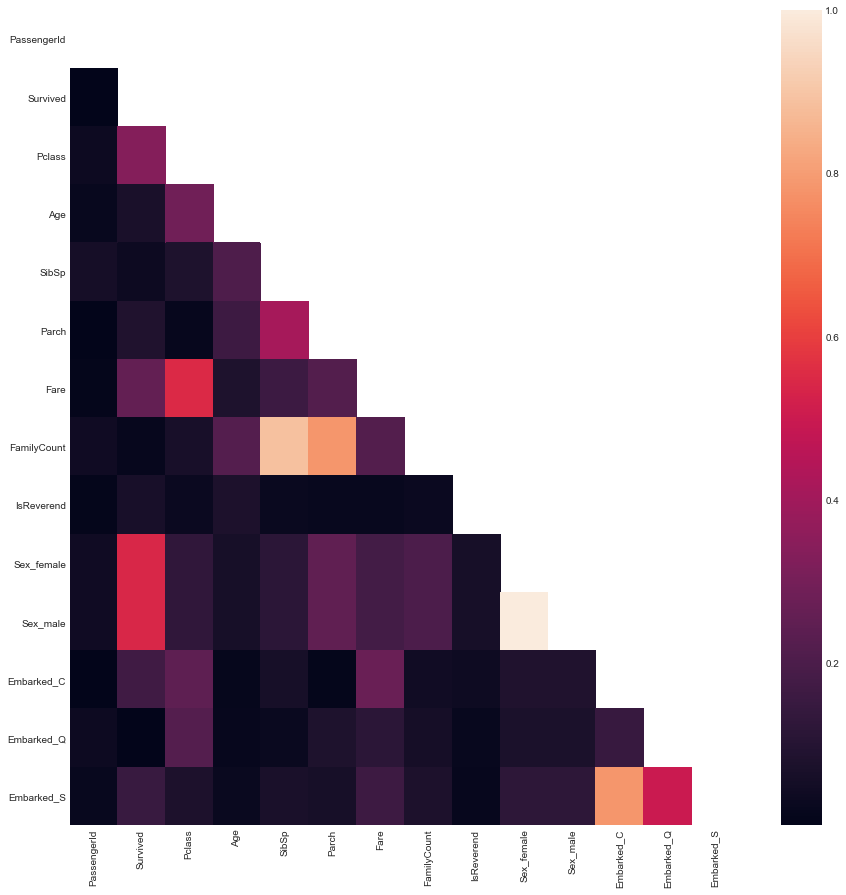

In [1306]:
#A heatmap that shows correlation
titanic_corr= titanic.corr().abs()
mask = np.zeros_like(titanic_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(titanic_corr, mask=mask)
plt.savefig('Heatmap.jpg')

## Setting the target and dropping it

In [1307]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
FamilyCount    889 non-null int64
IsReverend     889 non-null int64
Sex_female     889 non-null uint8
Sex_male       889 non-null uint8
Embarked_C     889 non-null uint8
Embarked_Q     889 non-null uint8
Embarked_S     889 non-null uint8
dtypes: float64(2), int64(7), object(3), uint8(5)
memory usage: 134.6+ KB


In [1308]:
target = titanic[["Survived"]]

In [1309]:
titanic.drop(['Survived'], axis=1, inplace=True)

In [1310]:
#Dropping other columns
titanic = titanic.drop(['Name','Ticket','Cabin','IsReverend'], axis=1)
test=test.drop(['Name','Ticket','Cabin'], axis=1)

In [1311]:
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilyCount,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [1312]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilyCount,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,2,1,0,0,0,1


# Models

In [1313]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
FamilyCount    889 non-null int64
Sex_female     889 non-null uint8
Sex_male       889 non-null uint8
Embarked_C     889 non-null uint8
Embarked_Q     889 non-null uint8
Embarked_S     889 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 99.9 KB


In [1314]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
FamilyCount    418 non-null int64
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 25.0 KB


In [1315]:
test.shape


(418, 12)

In [1316]:
X_train, X_holdout, y_train, y_holdout= train_test_split(titanic, target, random_state=1, stratify=target)

## Scaling

In [1317]:
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_holdout_scaled = ss.transform(X_holdout)
X_test = test
ss.fit(X_test)
X_test_scaled = ss.transform(X_test)


In [1318]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilyCount,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,2,1,0,0,0,1


### KNeighborsClassifier

In [1319]:
knn = KNeighborsClassifier()

In [1320]:
cross_val_score(knn, X_train_scaled, y_train).mean() 

/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.7942942942942944

In [1321]:
params = {
    'n_neighbors': [1,2,3,4,5],
    'p':[1,2,3,4],
    'weights':['uniform','distance']
}
gs = GridSearchCV(knn, params)
gs.fit(X_train_scaled, y_train)
print(gs.best_params_)
print(gs.best_score_)

/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/

{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.8018018018018018


/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [1322]:
gs.score(X_holdout_scaled, y_holdout)

0.8251121076233184

In [1323]:
X_test.shape

(418, 12)

In [1324]:
predictions = gs.predict(X_test_scaled)

In [1325]:
test['Survived'] = predictions

In [1327]:
test[['PassengerId', 'Survived']].to_csv('submission2.csv', index=False)

## Random Forests

In [1222]:
rf = RandomForestClassifier(42)
rf_params = {
    'n_estimators': [5,10,15,20],
    'max_depth': [None, 1,2,3],
    'max_features': ['auto', 'log2']
}
gs_rf = GridSearchCV(rf, rf_params)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
gs_rf.best_params_

/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/mod

0.8228228228228228


/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/mod

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 20}

In [1223]:
gs_rf.score(X_holdout_scaled, y_holdout)

0.7713004484304933

(418, 13)

In [1108]:
predictions_rf=gs_rf.predict(X_test_scaled)
predictions_rf

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1109]:
test['Survived'] = predictions_rf

In [1110]:
test[['PassengerId', 'Survived']].to_csv('submission_rf4.csv', index=False)

## GradientBoostingClassifier

In [1111]:
gb=GradientBoostingClassifier()
gb_params = {'max_depth': [2,4,8],
            'n_estimators':[25,50,100,150,200],
            }
gs_gb = GridSearchCV(gb, gb_params)
gs_gb.fit(X_train, y_train)
print(gs_gb.best_score_)
gs_gb.best_params_

/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed w

0.8288288288288288


/Users/norabertschicook/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 2, 'n_estimators': 50}

In [1112]:
gs_gb.score(X_holdout, y_holdout)

0.8385650224215246

In [1113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 427 to 464
Data columns (total 12 columns):
PassengerId    666 non-null int64
Pclass         666 non-null int64
Age            666 non-null float64
SibSp          666 non-null int64
Parch          666 non-null int64
Fare           666 non-null float64
FamilyCount    666 non-null int64
Sex_female     666 non-null uint8
Sex_male       666 non-null uint8
Embarked_C     666 non-null uint8
Embarked_Q     666 non-null uint8
Embarked_S     666 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 44.9 KB


In [1114]:
test.drop(['Survived'],axis=1, inplace=True)

In [1115]:
predictions_gs=gs_gb.predict(test)
predictions_gs

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [1116]:
test['Survived'] = predictions_gs

In [1117]:
test[['PassengerId', 'Survived']].to_csv('submissionGS.csv', index=False)

## Keras

In [1118]:
model=Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','MSE'])

train_keras=model.fit(X_train_scaled, y_train, validation_data=(X_holdout_scaled, y_holdout), epochs=100)
train_keras

Train on 666 samples, validate on 223 samples
Epoch 1/100
666/666 [==============================] - 1s 2ms/step - loss: 0.7030 - acc: 0.5616 - mean_squared_error: 0.2543 - val_loss: 0.6646 - val_acc: 0.6323 - val_mean_squared_error: 0.2352
Epoch 2/100
666/666 [==============================] - 0s 84us/step - loss: 0.6404 - acc: 0.6607 - mean_squared_error: 0.2242 - val_loss: 0.6105 - val_acc: 0.7085 - val_mean_squared_error: 0.2098
Epoch 3/100
666/666 [==============================] - 0s 88us/step - loss: 0.5933 - acc: 0.7072 - mean_squared_error: 0.2021 - val_loss: 0.5666 - val_acc: 0.7399 - val_mean_squared_error: 0.1897
Epoch 4/100
666/666 [==============================] - 0s 91us/step - loss: 0.5531 - acc: 0.7447 - mean_squared_error: 0.1838 - val_loss: 0.5266 - val_acc: 0.7937 - val_mean_squared_error: 0.1717
Epoch 5/100
666/666 [==============================] - 0s 91us/step - loss: 0.5198 - acc: 0.7883 - mean_squared_error: 0.1696 - val_loss: 0.5006 - val_acc: 0.7982 - val_me

<function matplotlib.pyplot.show>

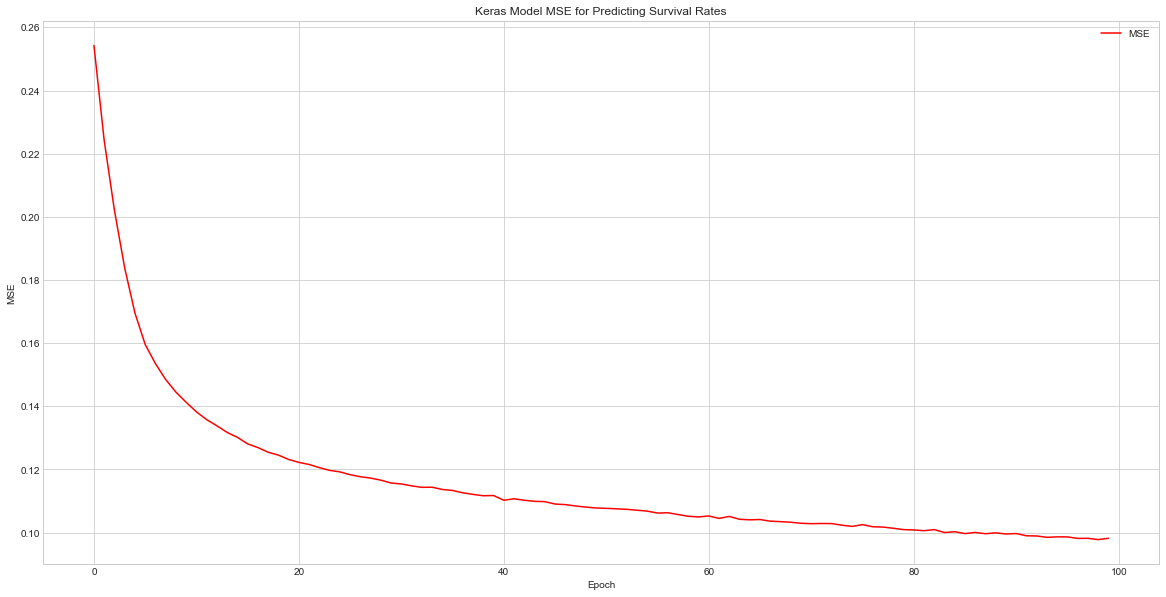

In [1119]:
plt.figure(figsize=(20,10))
plt.plot(train_keras.history['mean_squared_error'],color='red')
plt.title('Keras Model MSE for Predicting Survival Rates')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['MSE'], loc='upper right')
plt.savefig('MSE KERAS.jpg')
plt.show

In [1329]:
X_test.drop(['Survived'],axis=1, inplace=True)

In [1331]:
prediction3 = model.predict(X_test_scaled)
prediction3

array([[1.08452149e-01],
       [3.48571986e-01],
       [3.46297443e-01],
       [7.90820643e-02],
       [5.71193695e-01],
       [1.32264003e-01],
       [9.69041228e-01],
       [1.10082857e-01],
       [3.51758897e-01],
       [1.43259764e-02],
       [7.67251253e-02],
       [3.79091233e-01],
       [9.88646924e-01],
       [7.41737485e-02],
       [9.95079875e-01],
       [8.35112453e-01],
       [2.42058694e-01],
       [2.25230113e-01],
       [3.54185998e-01],
       [2.50380337e-01],
       [1.84547454e-01],
       [6.08884394e-01],
       [9.96388316e-01],
       [2.89018363e-01],
       [9.17455852e-01],
       [3.88061851e-02],
       [9.91009057e-01],
       [2.13608906e-01],
       [3.46761107e-01],
       [4.22770828e-02],
       [8.82110000e-02],
       [4.03226800e-02],
       [6.01517558e-01],
       [6.02376640e-01],
       [2.16985285e-01],
       [2.56586909e-01],
       [4.38992023e-01],
       [4.31953788e-01],
       [7.71968290e-02],
       [9.89423990e-02],


In [1003]:
test['Survived'] = predictions3

NameError: name 'predictions3' is not defined

In [ ]:
test[['PassengerId', 'Survived']].to_csv('submission4.csv', index=False)